# QuantumDNA: A Python Package for Analyzing Quantum Charge Dynamics in DNA and Exploring Its Biological Relevance

In [1]:
#!pip install qDNA

%load_ext autoreload
%autoreload 2
    
from qDNA import *
import matplotlib.pyplot as plt
import numpy as np

## 3. QuantumDNA Package Structure

### 3.1 Workflow Structure

In [2]:
oligo = Oligomer("tutorials/data/my_geometries/RCSB/1BNA1.pdb")
oligo.save_tb_params()

Exciton Lifetime 1070.1402805611222 fs
Charge Separation 2.1073241140052765 A


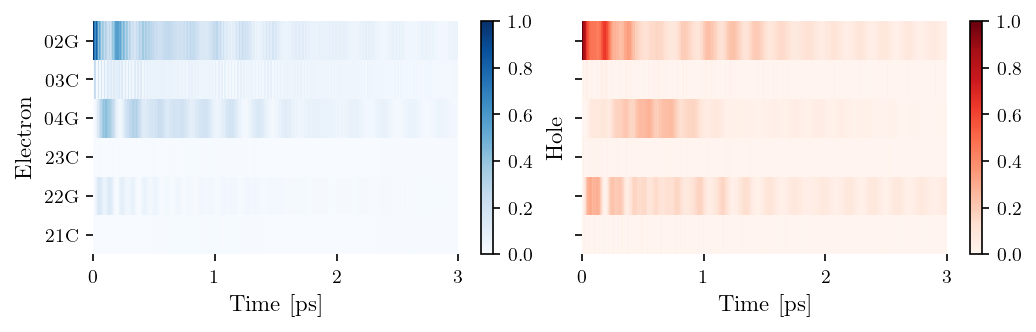

In [3]:
tb_sites = [['02G', '03C', '04G'], ['23C', '22G', '21C']]
vis = Visualization(tb_sites, relax_rate = 3., particles=['electron', 'hole'], source = "1BNA1")
fig, ax = vis.plot_heatmap()

lifetime = vis.calc_lifetime()
dipole = vis.calc_charge_separation()
    
print (f"Exciton Lifetime {lifetime} fs")
print (f"Charge Separation {dipole} A")

Exciton Lifetime 775.5511022044088 fs
Charge Separation 1.8965282682871307 A


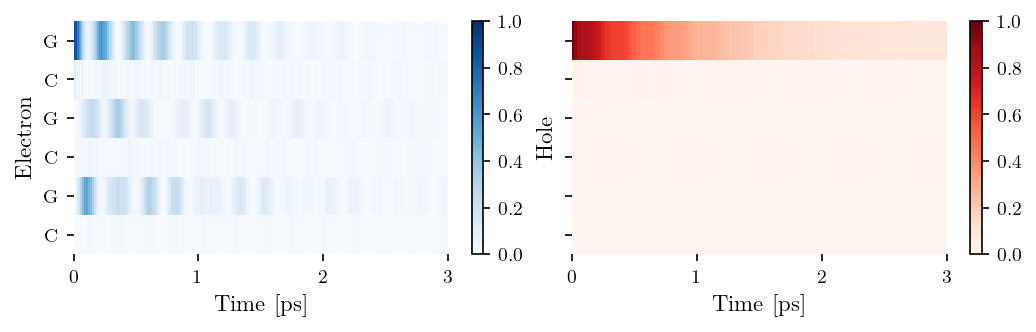

In [4]:
tb_sites = [['G', 'C', 'G'], ['C', 'G', 'C']]
vis = Visualization(tb_sites, relax_rate = 3., particles=['electron', 'hole'], source = "Hawke2010")
fig, ax = vis.plot_heatmap()

lifetime = vis.calc_lifetime()
dipole = vis.calc_charge_separation()
    
print (f"Exciton Lifetime {lifetime} fs")
print (f"Charge Separation {dipole} A")

### 3.2 GUI Setup and Usage

In [25]:
from qDNA.gui import qDNA_app

app = qDNA_app()
app.mainloop()

## 4. Methodologies

### 4.1 Linear Combination of Atomic Orbitals (LCAO)

In [5]:
mono1 = Monomer(["tutorials/data/my_geometries/PubChem/A.xyz"])
mono2 = Monomer(["tutorials/data/my_geometries/PubChem/T.xyz"])

t_EXC = calc_dipolar_coupling(mono1, mono2)
lcao_param = load_lcao_param('MSF')
H_inter = calc_H_inter(lcao_param, mono1, mono2)
t_HOMO = mono1.HOMO @ H_inter @ mono2.HOMO
t_LUMO = mono1.LUMO @ H_inter @ mono2.LUMO

print("TB parameters")
print("-------------------------------")
print(f"E_HOMO_A: {mono1.E_HOMO}", f"E_LUMO_A: {mono1.E_LUMO}")
print(f"E_HOMO_B: {mono2.E_HOMO}", f"E_LUMO_B: {mono2.E_LUMO}")
print(f"t_HOMO: {t_HOMO}", f"t_LUMO: {t_LUMO}", f"t_EXC: {t_EXC}")

TB parameters
-------------------------------
E_HOMO_A: -8.4407322055674 E_LUMO_A: -4.353816583266127
E_HOMO_B: -9.090176569811193 E_LUMO_B: -4.269864330116984
t_HOMO: 0.6026700721388009 t_LUMO: -1.2373368159162437 t_EXC: 5.386221507600993


### 4.2 Tight-Binding (TB) Models

In [6]:
from qDNA import TBHam 

kwargs = dict(coulomb_param = 1., exchange_param = 1.)
tb_ham = TBHam([list('GC'), list('CG')], **kwargs)
tb_matrix = tb_ham.get_matrix()

print(f"TB Hamiltonian: {tb_matrix}")

TB Hamiltonian: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -1.89888431e+04  1.21541396e+02 -1.82312094e+01
   4.55780234e+00  6.53285003e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.43082792e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.03853490e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  1.21541396e+02 -2.02060287e+04  1.51926745e+00
  -1.82312094e+01  0.00000000e+00  6.53285003e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.43082792e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.03853490e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -1.82312094e+01  1.51926745e+00 -2.02060287e+04
   1.21541396e+02  0.00000000e+00  0.00000000e+00  6.53285003e+01
   

In [7]:
from qDNA import TBHam

kwargs=dict(description='1P', particles=['hole'])
tb_ham = TBHam([list('GC'), list('CG')], **kwargs)

# Amplitudes and frequencies
tb_ham.get_amplitudes('(0, 0)', '(0, 0)')
tb_ham.get_frequencies('(0, 0)', '(0, 0)')

# Average populations
tb_ham.get_average_pop('(0, 0)', '(0, 0)')

{'hole': 0.49019576758190553}

## 5. Application and Benchmarking Examples

### 5.1 Reproduction of Ultrafast Excitonic Dynamics along the DNA

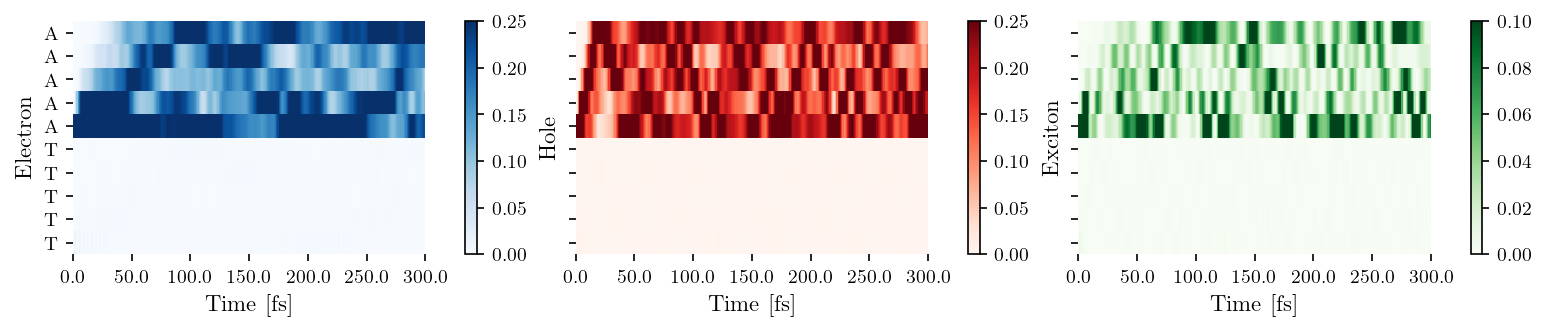

In [16]:
from qDNA import Visualization

tb_sites = [list('AAAAA'), list('TTTTT')]
kwargs = dict(relaxation=False, 
    source='Bittner2007', unit='rad/fs', 
    coulomb_interaction=2.5 * get_conversion('eV', 'rad/fs'), 
    exchange_interaction=1. * get_conversion('eV', 'rad/fs'), 
    init_e_states=['(0, 4)'],
    init_h_states=['(0, 4)'], 
    t_end=300, t_unit='fs', t_steps=300)

vis = Visualization(tb_sites, **kwargs)
fig, ax = vis.plot_heatmap(vmax_list=[0.25, 0.25, 0.1])

# plt.savefig("6_reproduction_Bittner.svg", transparant=True)
plt.show()

### 5.2 Modeling the Transition between Superexchange and Classical Hopping CT Regimes

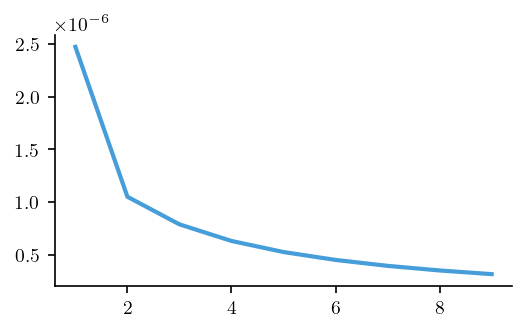

In [8]:
from qDNA import TBHam

kwargs = dict(description='1P', particles=['hole'], unit='rad/fs',
              relaxation=False, source='Simserides2014',
             tb_model_name = 'WM')

front_tail = 'ACGCACGTCGCATAATATTAC'
back_tail = 'TATTATATTACGC'
GGG_per_G = []
for num_steps in range(1, 10):
    bridge = 'TT' + 'GTT' * (num_steps-1)
    upper_strand = front_tail+'G'+bridge+'GGG'+back_tail
    tb_ham = TBHam(get_tb_sites(upper_strand), **kwargs)
    
    donor_site = '(0, 21)' # guanine left from the bridge    
    acceptor_sites = [
        f'(0, {21+len(bridge)+1})', 
        f'(0, {21+len(bridge)+2})',  
        f'(0, {21+len(bridge)+3})']

    donor_avg_pop = tb_ham.get_average_pop(donor_site, donor_site)['hole']
    acceptor_avg_pop = 0
    for acceptor_site in acceptor_sites:
        acceptor_avg_pop += tb_ham.get_average_pop(donor_site, acceptor_site)['hole']

    GGG_per_G_ratio = acceptor_avg_pop / donor_avg_pop 
    GGG_per_G.append(GGG_per_G_ratio)

plt.plot(list(range(1,10)), GGG_per_G)

In [18]:
from qDNA import TBHam

kwargs = dict(tb_model_name = 'WM', description='1P', particles=['hole'], 
              unit='rad/fs', relaxation=False, source='Simserides2014')

GGG_per_G = []
for num_steps in np.arange(1, 9):
    bridge = 'TT' + 'GTT' * (num_steps-1)
    upper_strand = 'ACGCACGTCGCATAATATTAC' + 'G' + bridge + 'GGG' + 'TATTATATTACGC'
    tb_ham = TBHam(get_tb_sites(upper_strand), **kwargs)
    
    donor_site = '(0, 21)' # guanine left from the bridge    
    acceptor_sites = [f'(0, {21+len(bridge)+1})', f'(0, {21+len(bridge)+2})',  f'(0, {21+len(bridge)+3})']

    donor_avg_pop = tb_ham.get_average_pop(donor_site, donor_site)['hole']
    acceptor_avg_pop = 0
    for acceptor_site in acceptor_sites:
        acceptor_avg_pop += tb_ham.get_average_pop(donor_site, acceptor_site)['hole']

    GGG_per_G_ratio = acceptor_avg_pop / donor_avg_pop 
    GGG_per_G.append(GGG_per_G_ratio)

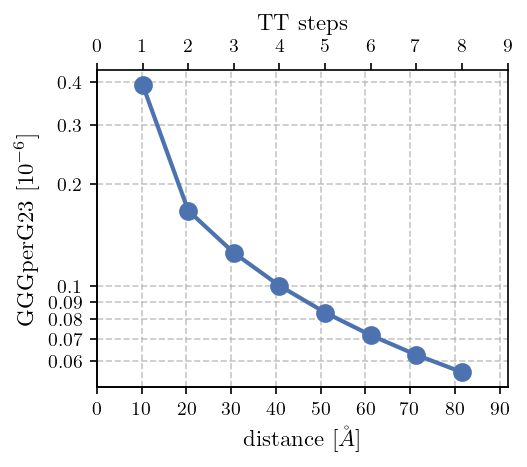

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3.4,3))

colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)]

ax.plot(np.arange(1, 9) * 3 * 3.4, np.array(GGG_per_G)/(2*np.pi), 'o-', color=colors[0])

top_ticks = np.arange(0,100,10)
top_labels = np.arange(0,100,10)
ax.set_xticks(top_ticks)
ax.set_xticklabels(top_labels)

ax.set_yscale('log')
ax.set_xlim(0, 9*3*3.4)
ax.set_xlabel(r'distance [$\AA$]')
ax.set_ylabel(r'GGGperG23 [$10^{-6}$]')

ax2 = ax.twiny()
# ax2.plot(np.arange(1, 9), np.array(ratio_list)/(2*np.pi) * np.e**2, 'o-', color=colors[1] )

ax2.set_xlabel(r'TT steps')
top_ticks = np.arange(0, 10)
top_labels = np.arange(0, 10) 
ax2.set_xticks(top_ticks)
ax2.set_xticklabels(top_labels)

ax.set_yticks([6e-8, 7e-8, 8e-8, 9e-8, 1e-7, 2e-7, 3e-7, 4e-7])
ax.set_yticklabels([0.06, 0.07, 0.08, 0.09, 0.10, 0.20, 0.30, 0.40])

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.grid(True)

# plt.savefig("figures/6_reproduce_Simserides.svg", transparent=True)
plt.show()

### 5.3 Quantum Charge Dynamics over an Isolated or Open DNA Chain

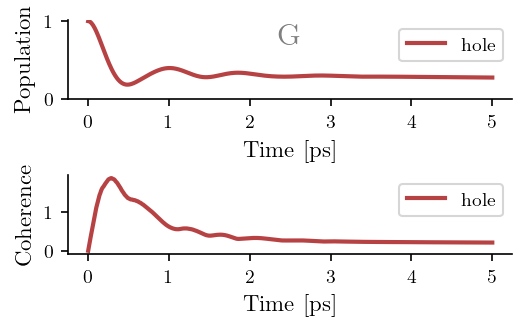

In [9]:
from qDNA import Visualization

upper_strand = 'GCACG'
tb_site = '(0, 0)'

# change particle to ['electron'], loc_deph_rate and glob_deph_rate
kwargs = dict(description='1P', t_end=5, 
            particles=['hole'],
            loc_deph_rate=2,
            glob_deph_rate=0,
            tb_model_name = 'LM')

vis = Visualization(get_tb_sites(upper_strand), **kwargs)

fig, ax = plt.subplots(2, 1)
ax[0] = vis.plot_pop(tb_site, fig=fig, ax=ax[0])
ax[1] = vis.plot_coh(fig=fig, ax=ax[1])

In [10]:
import seaborn as sns

upper_strand = 'GCACG'
tb_site = '(0, 0)'
vis_list = []

tb_sites = get_tb_sites(upper_strand)
for particles in [['hole'], ['electron']]:
    kwargs = dict(description='1P', particles=particles, t_end=5, t_steps=1000, tb_model_name='LM')
    vis = Visualization(tb_sites, **kwargs)
    vis.get_result()
    vis_list.append( vis )
    
    kwargs = dict(description='1P', particles=particles, loc_deph_rate=2, t_end=5, t_steps=1000, tb_model_name='LM')
    vis = Visualization(tb_sites, **kwargs)
    vis.get_result()
    vis_list.append( vis )
    
    kwargs = dict(description='1P', particles=particles, glob_deph_rate=2, t_end=5, t_steps=1000, tb_model_name='LM')
    vis = Visualization(tb_sites, **kwargs)
    vis.get_result()
    vis_list.append( vis )

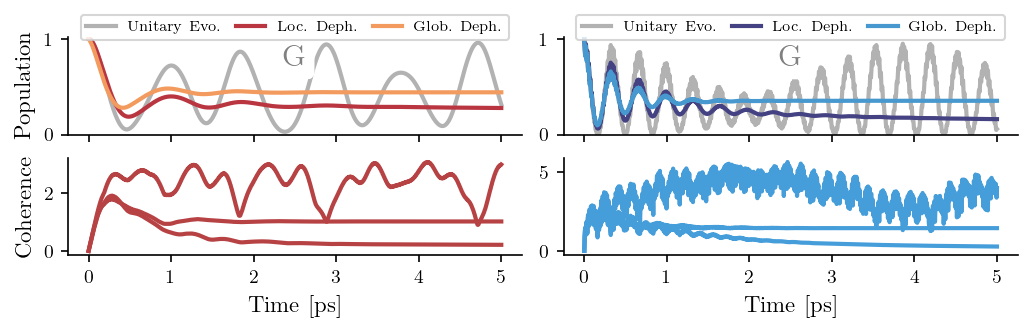

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(6.8, 2.1), sharex=True)
ax = ax.flatten()

labels = ["Unitary Evo.", "Loc. Deph.", "Glob. Deph.", "Unitary Evo.", "Loc. Deph.", "Glob. Deph."]
ls =  ['-', '-', '-', '-', '-', '-']
color_palette = sns.color_palette('icefire', n_colors=11)
gray='#b2b2b2'
colors = [gray, color_palette[-3], color_palette[-1], gray, color_palette[3], color_palette[1]]

for i, vis in enumerate(vis_list):
    plot_kwargs = dict(label=labels[i], color=colors[i], ls=ls[i])
    vis.plot_pop(tb_site, fig=fig, ax=ax[0+i//3], add_legend=False, **plot_kwargs)
    vis.plot_coh(fig=fig, ax= ax[2+i//3], add_legend=False, **plot_kwargs)

ax[0].set_ylim(0, 1.02)
ax[0].set_ylabel("Population")
ax[2].set_ylabel("Coherence")
ax[2].set_xlabel("Time [" + vis.t_unit + "]")
ax[3].set_xlabel("Time [" + vis.t_unit + "]")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, columnspacing=1, fontsize=7)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, columnspacing=1, fontsize=7)

# plt.savefig('figures/6_isolated_open.svg', transparent=True)
plt.show()

## Appendix

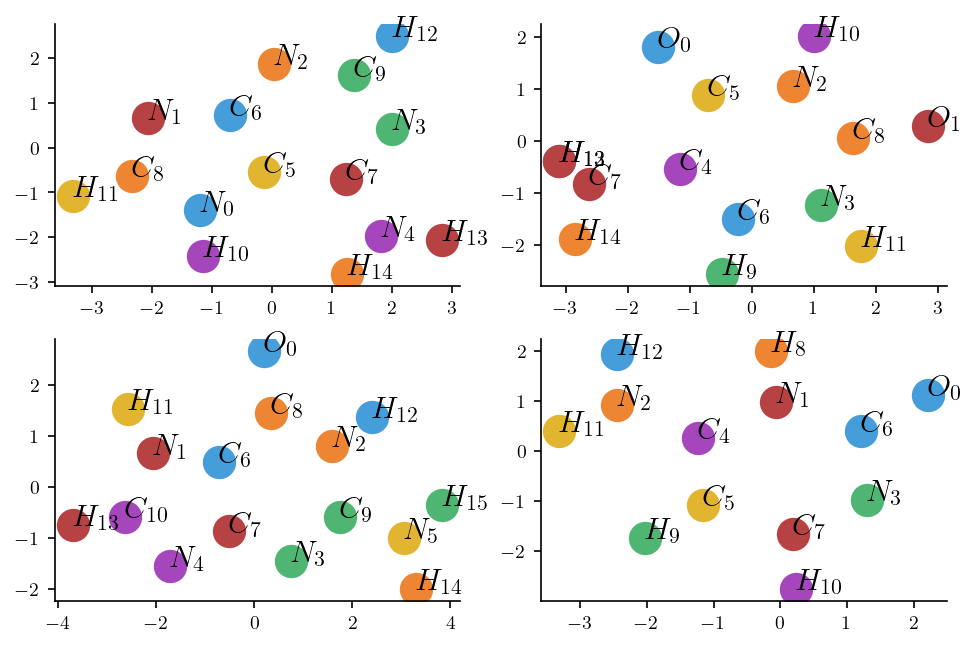

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(6.4, 4.2))
axes = ax.flatten()

directory = os.path.join(os.getcwd(), "tutorials", "data", "my_geometries", "PubChem")
filenames = ['A', 'T', 'G', 'C']
for i, filename in enumerate(filenames):
    filepath = os.path.join(directory, filename+'.xyz')
    monomer = Monomer([filepath])
    
    atom_identifiers = []
    for atom_identifier in monomer.atoms_id:
        atom, number = atom_identifier.split('_')
        atom_identifiers.append( f'${atom}_{{{number}}}$' )
    
    for j, atom_identifier in enumerate(atom_identifiers):
        axes[i].plot( monomer.atoms_coordinates[j][0], monomer.atoms_coordinates[j][1], '.', markersize=30)
        axes[i].text( monomer.atoms_coordinates[j][0], monomer.atoms_coordinates[j][1], f'{atom_identifier}', fontsize =15)

# plt.savefig('figures/base_geometries.svg', transparent=True)
plt.show()

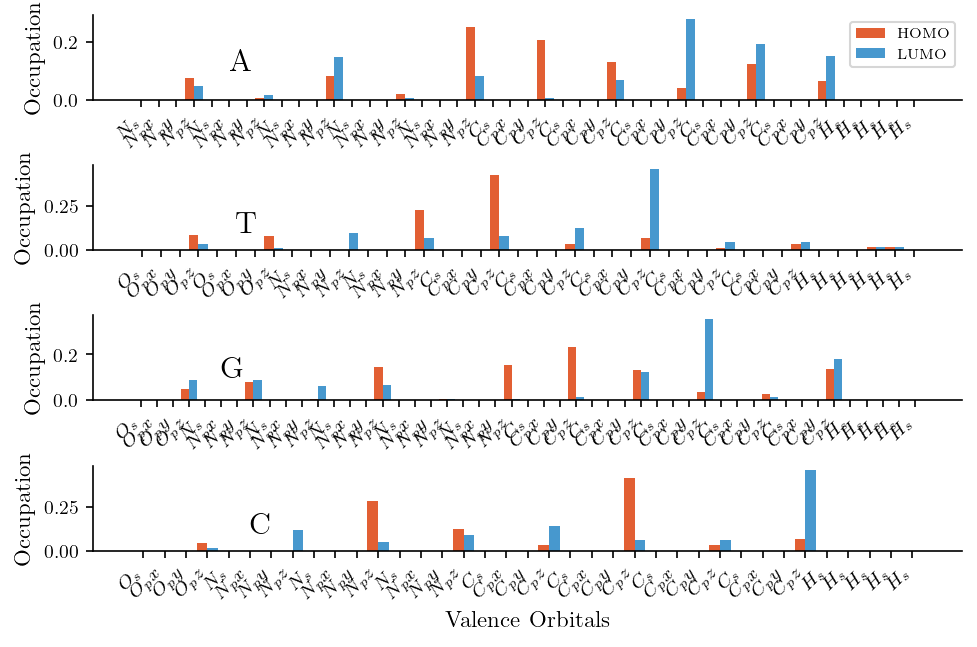

In [11]:
bar_width = 0.5
fig, ax = plt.subplots(4, 1, figsize=(6.4, 4.2))

directory = os.path.join(os.getcwd(), "tutorials", "data", "my_geometries", "PubChem")
filenames = ['A', 'T', 'G', 'C']
for i, filename in enumerate(filenames):
    filepath = os.path.join(directory, filename+'.xyz')
    monomer = Monomer([filepath])

    x = np.arange(monomer.num_orbitals)
    ax[i].bar(x - bar_width/2, np.abs(monomer.HOMO)**2, width=bar_width, label='HOMO', color='#e25f33')
    ax[i].bar(x + bar_width/2, np.abs(monomer.LUMO)**2, width=bar_width, label='LUMO', color='#4798ce')

    orbital_identifiers = []
    for orbital_identifier in monomer.orbitals:
        atom, orbital = orbital_identifier.split('_')
        orbital_identifiers.append( f'${atom}_{orbital}$' )
    
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(orbital_identifiers, rotation=45, ha='right', fontsize='small')
    
    ax[i].text(5, 0.1, filename, fontsize=15)
    ax[i].set_ylabel("Occupation")

ax[3].set_xlabel("Valence Orbitals")
ax[0].legend(fontsize=7)

# plt.savefig('figures/orbital_occupations.svg', transparent=True)
plt.show()

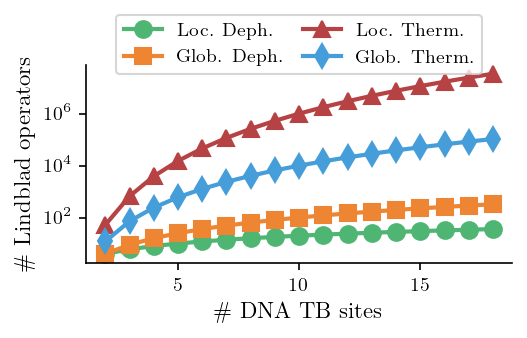

In [12]:
import seaborn as sns
# plot the number of Lindblad operators 

N = np.arange(2, 19)
fig, ax = plt.subplots()
colors = sns.color_palette()[:4]

# Plotting the data with different markers and reduced opacity for lines
ax.plot(N, 2 * N, marker='o', markersize=8, linestyle='-', color=colors[3], alpha=1, label='Loc. Deph.')
ax.plot(N, N**2, marker='s', markersize=8, linestyle='-', color=colors[2], alpha=1, label='Glob. Deph.')
ax.plot(N, N**2 * (N**4 - N**2 + 1), marker='^', markersize=8, linestyle='-', color=colors[1], alpha=1, label='Loc. Therm.')
ax.plot(N, N**4 - N**2, marker='d', markersize=8, linestyle='-', color=colors[0], alpha=1, label='Glob. Therm.')

ax.set_yscale('log')
ax.set_xlabel(r"$\#$ DNA TB sites")
ax.set_ylabel(r"$\#$ Lindblad operators")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, columnspacing=1, fontsize='small')

# fig.savefig('figures/scaling.svg', transparent=True)
plt.show()

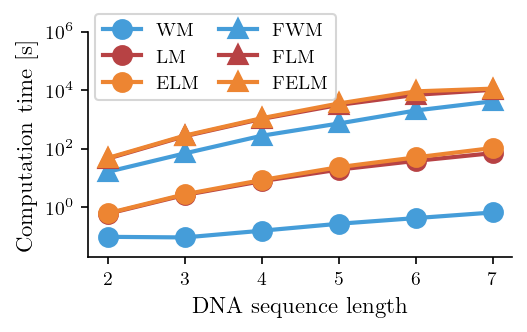

In [13]:
# time for uniform adenine sequences (different lengths and models)
calc_times = np.array([[0.04849529266357422, 0.04625391960144043, 0.07857656478881836, 0.13587403297424316, 0.21225285530090332, 0.3305344581604004],
        [0.2975034713745117, 1.308180570602417, 3.8845632076263428, 9.669641017913818, 19.188920259475708, 35.40109610557556],
        [0.30926942825317383, 1.379915475845337, 4.239468812942505, 11.73042607307434, 25.32820200920105, 52.95796084403992],
        [8.07165561, 34.5582086, 139.004404, 364.221048, 1015.64643, 2094.59942],
        [22.8213988, 133.818269, 523.606570, 1572.64914, 3480.68617, 5173.29872],
        [23.9733094, 140.136105, 553.018477, 1760.12157, 4562.22129, 5655.94587]])

tb_model_list = ['WM', 'LM', 'ELM', 'FWM', 'FLM', 'FELM']
num_bases_list = [2, 3, 4, 5, 6, 7]

colors = colors = sns.color_palette()[:3] * 2
markers = ['o'] * 3 + ['^'] * 3


fig, ax = plt.subplots()

for i, (tb_model, calc_time) in enumerate(zip(tb_model_list,calc_times)):
    ax.plot(num_bases_list, np.array(calc_time)*2, color=colors[i], label=tb_model,
            marker=markers[i], markersize=8, mec=colors[i], mew=2)

ax.legend(loc='upper center', bbox_to_anchor=(0.3, 1.12), ncol=2, columnspacing=1)
ax.set_ylim(0.2*1e-1, 1e6)
ax.set_xlabel('DNA sequence length')
ax.set_ylabel('Computation time [s]')
ax.set_yscale('log')

# plt.savefig('figures/computation_time.svg', transparent=True)
plt.show()